In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [26]:
df = pd.read_csv('yellow_tripdata_sample.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               995 non-null    int64  
 1   tpep_pickup_datetime   995 non-null    object 
 2   tpep_dropoff_datetime  995 non-null    object 
 3   passenger_count        995 non-null    float64
 4   trip_distance          995 non-null    float64
 5   RatecodeID             995 non-null    float64
 6   store_and_fwd_flag     995 non-null    object 
 7   PULocationID           995 non-null    int64  
 8   DOLocationID           995 non-null    int64  
 9   payment_type           995 non-null    int64  
 10  fare_amount            995 non-null    float64
 11  extra                  995 non-null    float64
 12  mta_tax                995 non-null    float64
 13  tip_amount             995 non-null    float64
 14  tolls_amount           995 non-null    float64
 15  improv

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [27]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [22]:
#Univariate Analysis

In [28]:
cols = ['passenger_count','trip_distance','fare_amount','total_amount','tip_amount','extra']

summary = pd.DataFrame({
    'mean': df[cols].mean(),
    'median': df[cols].median(),
    'mode': df[cols].mode().iloc[0],
    'min': df[cols].min(),
    'max': df[cols].max(),
    'std_dev': df[cols].std(),
    'variance': df[cols].var(),
    'skewness': df[cols].skew(),
    'kurtosis': df[cols].kurtosis(),
    'count': df[cols].count(),
    'missing': df[cols].isna().sum()
})

print(summary)

                      mean  median   mode   min     max    std_dev  \
passenger_count   1.581910    1.00   1.00   0.0    6.00   0.911625   
trip_distance     2.890472    1.96   0.90   0.0   23.90   3.125268   
fare_amount      18.278593   14.20   6.50 -47.8  180.00  14.916422   
total_amount     26.847538   22.20  16.32 -52.8  217.20  18.092018   
tip_amount        3.483146    3.00   0.00   0.0   80.00   4.195507   
extra             1.741457    1.00   1.00  -1.0    7.75   1.255742   

                   variance  skewness    kurtosis  count  missing  
passenger_count    0.831061  1.664330    2.827890    995        0  
trip_distance      9.767299  3.288172   13.975566    995        0  
fare_amount      222.499652  3.012440   20.739873    995        0  
total_amount     327.321108  3.025344   20.194071    995        0  
tip_amount        17.602279  7.328237  115.485646    995        0  
extra              1.576889  1.149621    0.717987    995        0  


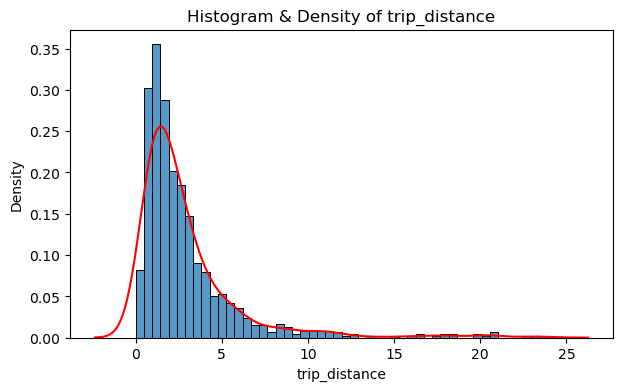

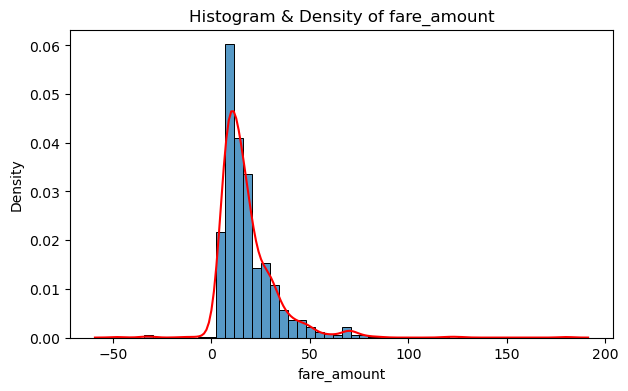

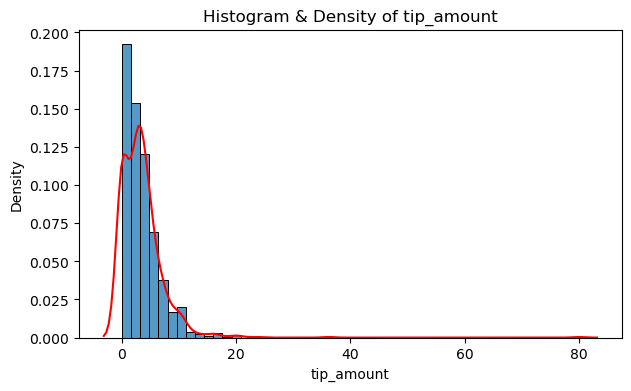

In [31]:
for col in ['trip_distance','fare_amount','tip_amount']:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], bins=50, kde=False, stat='density')
    sns.kdeplot(df[col], color='red')
    plt.title(f'Histogram & Density of {col}')
    plt.show()

In [56]:
#Observations...
#We can see the above data are right skewed, that means there are less people who travell long distance , generally people do taxies for short distance like unpti 10-15 km.
#Around people do taxies for around 2-3km travel distance
#Maximum people do not give tips

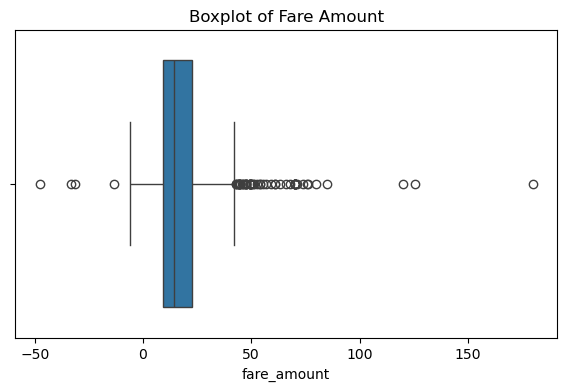

In [32]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.show()

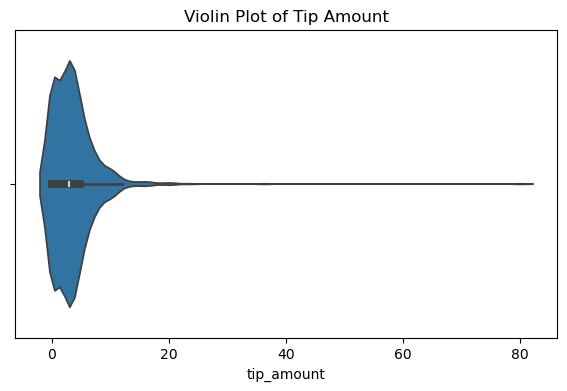

In [33]:
plt.figure(figsize=(7,4))
sns.violinplot(x=df['tip_amount'])
plt.title('Violin Plot of Tip Amount')
plt.show()

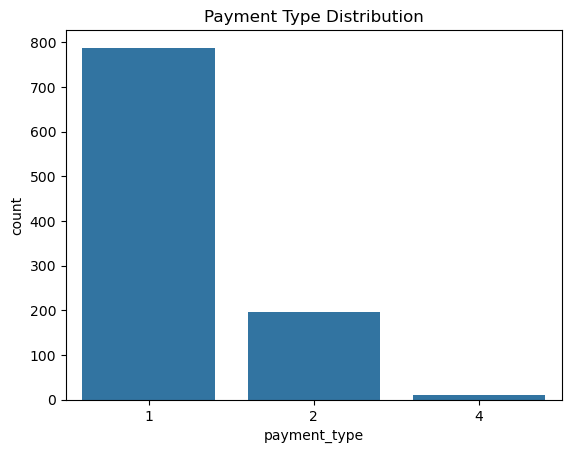

In [34]:
sns.countplot(x='payment_type', data=df)
plt.title('Payment Type Distribution')
plt.show()

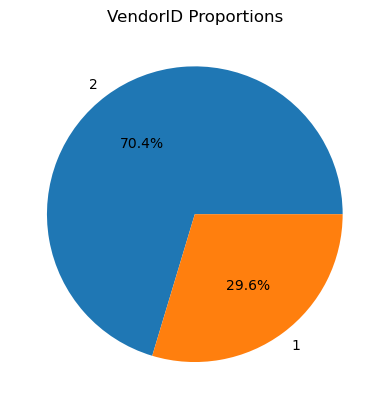

In [35]:
vendor_counts = df['VendorID'].value_counts()
plt.pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%')
plt.title('VendorID Proportions')
plt.show()

In [57]:
def mean_ci(series, confidence=0.95):
    data = series.dropna()
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1+confidence)/2, len(data)-1)
    return mean, mean-h, mean+h

for col in ['trip_distance','fare_amount','tip_amount']:
    m, low, high = mean_ci(df[col])
    print(f"95% CI for {col}: mean={m:.2f}, CI=({low:.2f}, {high:.2f})")

95% CI for trip_distance: mean=2.89, CI=(2.70, 3.08)
95% CI for fare_amount: mean=18.28, CI=(17.35, 19.21)
95% CI for tip_amount: mean=3.48, CI=(3.22, 3.74)


In [58]:
tips = df['tip_amount'].dropna()

t_stat, p_value = stats.ttest_1samp(tips, 2)

print("One-Sample t-test (Tip Amount = $2)")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject H0 → Mean tip is significantly different from $2")
else:
    print("Fail to Reject H0 → Mean tip ≈ $2")

One-Sample t-test (Tip Amount = $2)
t-statistic: 11.150925555592355
p-value: 2.7284426078462357e-27
Reject H0 → Mean tip is significantly different from $2


In [59]:
credit_fares = df[df['payment_type'] == 1]['fare_amount'].dropna()
cash_fares   = df[df['payment_type'] == 2]['fare_amount'].dropna()

t_stat, p_value = stats.ttest_ind(credit_fares, cash_fares, equal_var=False)

print("\nTwo-Sample t-test (Fare: Credit vs Cash)")
print("t-statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject H0 → Average fare differs between Credit Card and Cash payments")
else:
    print("Fail to Reject H0 → No significant difference in average fare")


Two-Sample t-test (Fare: Credit vs Cash)
t-statistic: 0.24718152792576853
p-value: 0.8049474196415387
Fail to Reject H0 → No significant difference in average fare


In [60]:
contingency = pd.crosstab(df['payment_type'], df['RatecodeID'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-Square Test of Independence (Payment_type vs RateCodeID)")
print("Chi2 Statistic:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject H0 → Payment_type and RateCodeID are NOT independent")
else:
    print("Fail to Reject H0 → Payment_type and RateCodeID are independent")



Chi-Square Test of Independence (Payment_type vs RateCodeID)
Chi2 Statistic: 6.8534559719244
p-value: 0.5525232153774795
Fail to Reject H0 → Payment_type and RateCodeID are independent


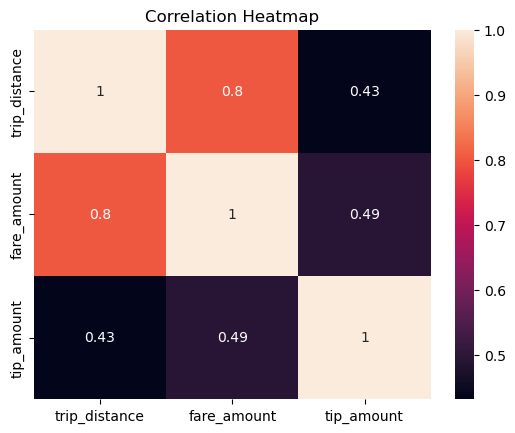

In [61]:
sns.heatmap(df[['trip_distance','fare_amount','tip_amount']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

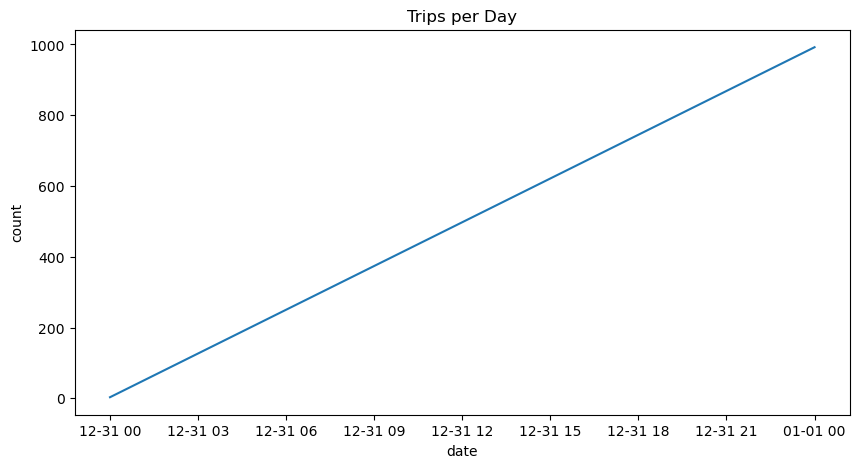

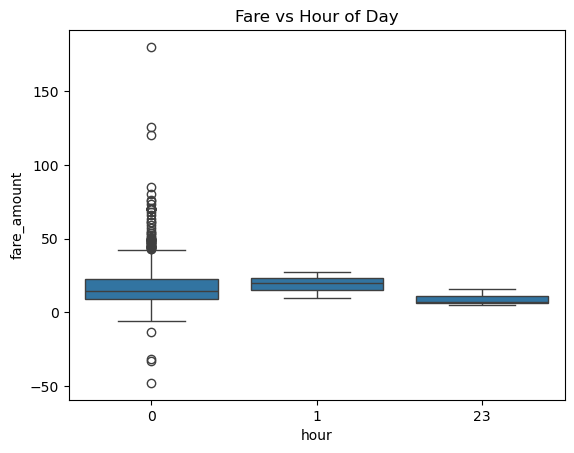

In [62]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.date

trip_count_daily = df.groupby('date').size()
trip_count_daily.plot(figsize=(10,5))
plt.title('Trips per Day')
plt.ylabel('count')
plt.show()

df['hour'] = df['tpep_pickup_datetime'].dt.hour
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title('Fare vs Hour of Day')
plt.show()

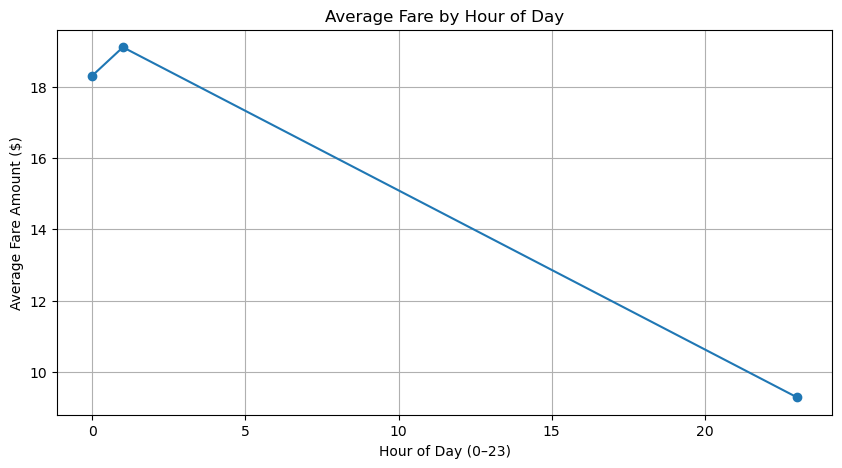

In [64]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour
avg_fare_by_hour = df.groupby('hour')['fare_amount'].mean()

plt.figure(figsize=(10,5))
avg_fare_by_hour.plot(kind='line', marker='o')
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Fare Amount ($)")
plt.grid(True)
plt.show()

Top Pickup Zones:
 PULocationID
79     58
142    55
239    44
237    44
249    39
263    36
234    35
229    34
236    32
148    31
Name: count, dtype: int64
Top Dropoff Zones:
 DOLocationID
170    41
79     39
239    37
263    36
141    35
238    34
229    33
237    32
68     27
236    27
Name: count, dtype: int64


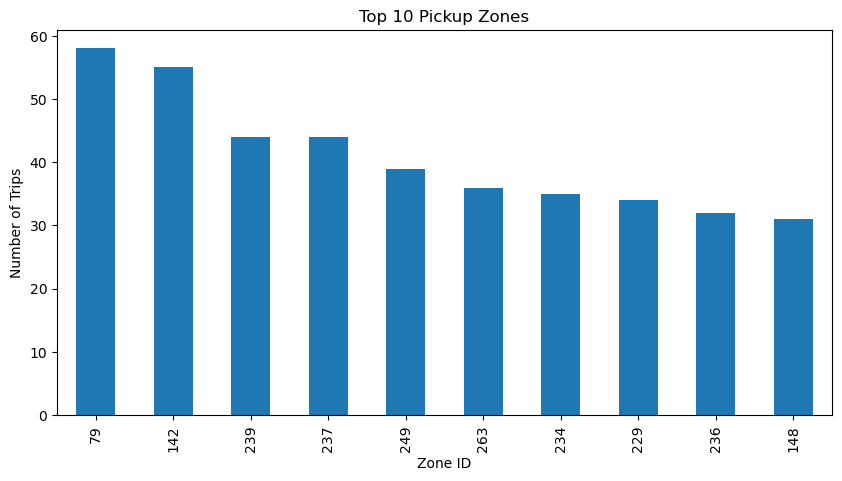

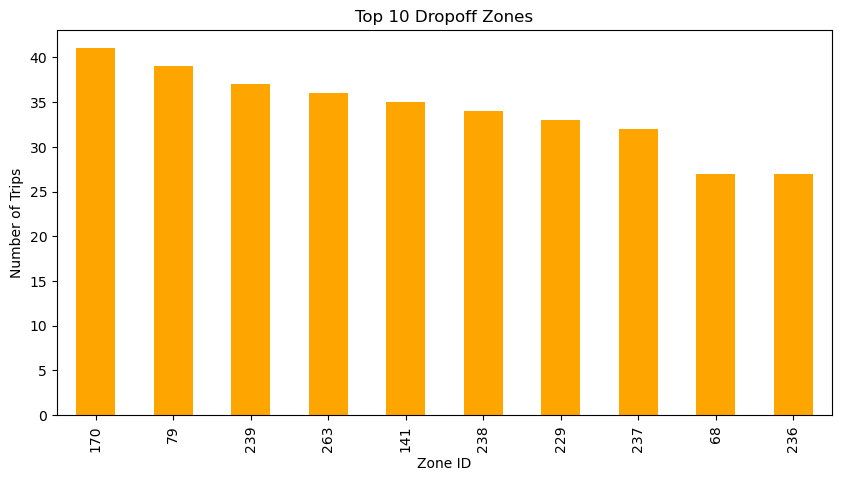

In [55]:
top_pickups = df['PULocationID'].value_counts().head(10)

top_dropoffs = df['DOLocationID'].value_counts().head(10)

print("Top Pickup Zones:\n", top_pickups)
print("Top Dropoff Zones:\n", top_dropoffs)

plt.figure(figsize=(10,5))
top_pickups.plot(kind='bar')
plt.title("Top 10 Pickup Zones")
plt.xlabel("Zone ID")
plt.ylabel("Number of Trips")
plt.show()

plt.figure(figsize=(10,5))
top_dropoffs.plot(kind='bar', color='orange')
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Zone ID")
plt.ylabel("Number of Trips")
plt.show()